# Model Specifications

## Host Specifications

The host may be in one of 4 states:

- susceptible (S_H)

- incubation period (E_H)

- infectious (I_H)

- recovered (R_H)

## Vector Specifications 

The vector may be in one of 3 states:

- susceptible (S_V)

- incubation period (E_V)

- infectious (I_V)

# Model Parameters

σ_H, σ_V: the incubation rates for hosts & vectors (units: per time)

μ_H, μ_V: the mortality rates for hosts & vectors (units: per time)

λ: the clearance (or recovery) rate for hosts (units: per time)

β: the infection rate (units: per capita per time)

In [2]:
function F(du,u,p,t)
    S_H, E_H, I_H, R_H, S_V, E_V, I_V = u
    
    # host dynamics
    host_infection = (p.β*S_H*I_V)/p.N_H
    host_mortality = p.μ_H .* u[1:4] # include S_H, so easier to remove mortality
    host_births = sum(host_mortality)
    host_progression = p.σ_H*E_H
    recovery = p.λ*I_H
    
    du[1] = -host_infection + host_births
    du[2] = host_infection - host_progression
    du[3] = host_progression - recovery
    du[4] = recovery
    du[1:4] -= host_mortality
    
    # vector dynamics
    vec_infection = (p.β*S_V*I_H)/p.N_H
    vec_mortality = p.μ_V .* u[5:7] # include S_V, so easier to remove mortality
    vec_births = sum(vec_mortality)
    vec_progression = p.σ_V*E_V
    
    du[5] = -vec_infection + vec_births
    du[6] = vec_infection - vec_progression
    du[7] = vec_progression
    du[5:7] -= vec_mortality
    
end

F (generic function with 1 method)

In [10]:
using DifferentialEquations
using IterableTables, DataFrames

u0 = [
    100.0,  0.0, 1.0, 0.0,
    10000.0, 0.0, 0.0
]
p = (
  μ_H=1/365, μ_V=1/30, σ_H=1/3, σ_V=1/7, λ=1/14,
  β=0.05, N_H = sum(u0[1:4])
)
tspan = (0.0, 365.0)
prob = ODEProblem(F, u0, tspan, p)
sol = @time solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8,saveat=range(0,stop = 365,length = 365*10+1))

df = DataFrame(sol')
rename!(df,:x1 => :S_H,:x2 => :E_H, :x3 => :I_H, :x4 => :R_H,
  :x5 => :S_V, :x6 => :E_V, :x7 => :I_V)
df.t = collect(range(0,stop = 365,length = 365*10+1));

  0.002311 seconds (21.00 k allocations: 2.842 MiB)


In [4]:
first(df,10)

,S_H,E_H,I_H,R_H,S_V,E_V,I_V,t
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,100.0,0.0,1.0,0.0,10000.0,0.0,0.0,0.0
2,100.0,5.7454e-6,0.992611,0.00711546,9999.51,0.488881,0.00350275,0.1
3,100.001,4.52579e-5,0.985277,0.0141764,9999.02,0.965588,0.0138791,0.2
4,100.001,0.000150406,0.977999,0.0211832,9998.54,1.43036,0.0309342,0.3
5,100.001,0.000351065,0.97078,0.0281363,9998.06,1.88344,0.0544774,0.4
6,100.001,0.000675207,0.963623,0.0350362,9997.59,2.32505,0.0843219,0.5
7,100.0,0.00114898,0.956533,0.0418834,9997.12,2.75544,0.120285,0.6
8,100.0,0.00179678,0.949513,0.0486782,9996.66,3.17482,0.162188,0.7
9,99.9994,0.00264133,0.94257,0.0554213,9996.21,3.58344,0.209855,0.8


In [5]:
using StatPlots

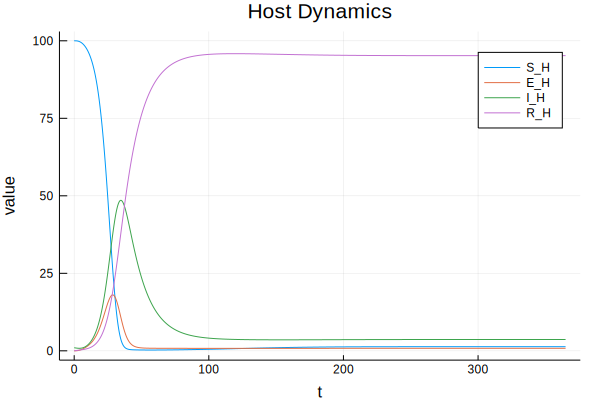

In [6]:
plot(df.t, [df.S_H,df.E_H,df.I_H,df.R_H],xlabel="t",ylabel="value",title="Host Dynamics",label=["S_H","E_H","I_H","R_H"])

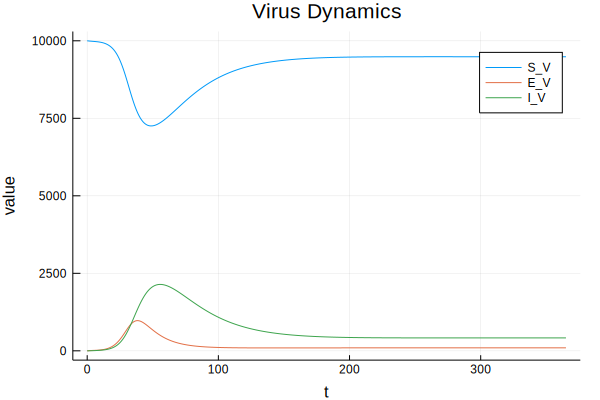

In [7]:
plot(df.t,[df.S_V,df.E_V,df.I_V],xlabel="t",ylabel="value",title="Virus Dynamics",label=["S_V","E_V","I_V"])